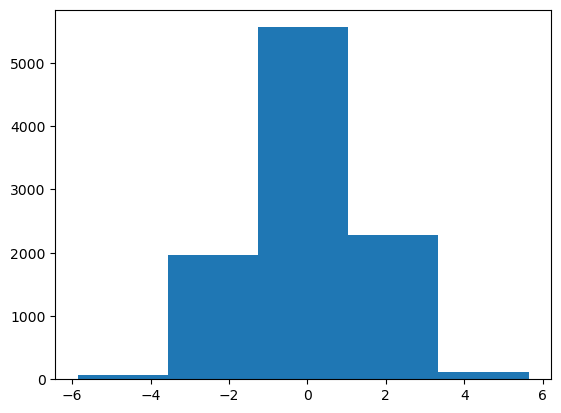

0.9593


In [3]:
import random  
import matplotlib.pyplot as plt  
    
# store the random numbers in a list  
nums = []  
mu = 0
sigma = 1.5
threes = 0
    
for i in range(10000):  
    temp = random.gauss(mu, sigma)
    if temp > -3 and temp < 3: threes += 1   
    nums.append(temp)  
        
# plotting a graph  
plt.hist(nums, bins = 5)  
plt.show()
print(threes/10000) 

     deg     theta      magdB
179    0  0.000000  25.759111
180    1  0.017453  25.513777
181    2  0.034907  24.767265
182    3  0.052360  23.497477
183    4  0.069813  21.664482
..   ...       ...        ...
174  355  6.195919  15.978206
175  356  6.213372  19.176024
176  357  6.230825  21.645241
177  358  6.248279  23.484986
178  359  6.265732  24.759739

[360 rows x 3 columns]


C:\Users\euan\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Model.py:345: RuntimeWarning: divide by zero encountered in log10
  return signal - (20*np.log10(dist)+40.05-rec_gain)
c:\Users\euan\OneDrive\Desktop\Disserta

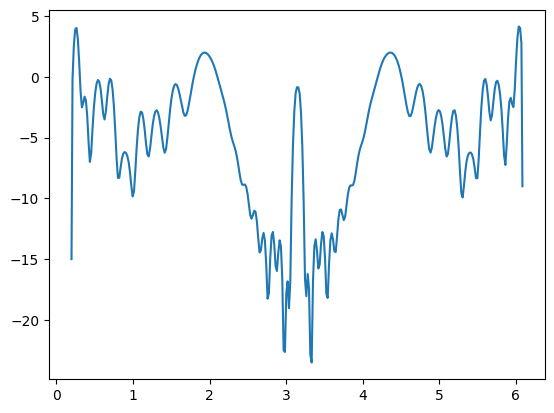

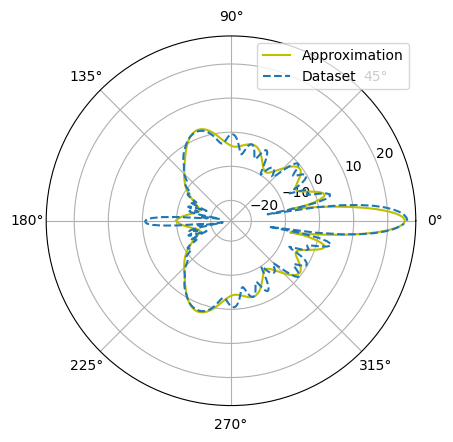

In [2]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def main_lobe_gain(theta):
    g = 50 * np.power(np.cos(theta),57)
    return g-25

wanted_keys = ('theta', 'magdB')
mat = scipy.io.loadmat('ExampleDishFarfieldAz.mat')
pqr = pd.Series(mat)
mat_dict = {key : pqr.to_dict()[key] for key in wanted_keys}
theta = []
deg = []
magdB = []
zeroVal = 0

for i in range(0, len(mat_dict['theta'][0])):
    if mat_dict['theta'][0][i] == 0: zeroVal = mat_dict['magdB'][i][0]
    if mat_dict['theta'][0][i] < 0: 
        theta.append(np.deg2rad(mat_dict['theta'][0][i] + 360))
        deg.append(mat_dict['theta'][0][i]+360)
    else:
        theta.append(np.deg2rad(mat_dict['theta'][0][i]))
        deg.append(mat_dict['theta'][0][i])
    magdB.append(mat_dict['magdB'][i][0])

df = pd.DataFrame()

df["deg"] = deg
df["theta"] = theta
df["magdB"] = magdB

df = df.sort_values("deg")
print(df)

tune = np.pi/16

left_lobe_thetas = np.array(df['theta']) > tune # and np.array(df['theta']) < (np.pi*2)-np.pi/16
right_lobe_thetas = np.array(df['theta']) < (np.pi*2)-tune
side_lobe_thetas = np.logical_and(left_lobe_thetas,right_lobe_thetas)

side_lobes = df['theta'][side_lobe_thetas]
lobes_dB = df['magdB'][side_lobe_thetas]

side_lobes = np.append(side_lobes,((np.pi*2)-tune))
side_lobes = np.insert(side_lobes,0,tune)

lobes_dB = np.append(lobes_dB,-9)
lobes_dB = np.insert(lobes_dB,0,-15)

figa = plt.figure()
bx = figa.add_subplot()
bx.plot(side_lobes,lobes_dB)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

coeffs = np.polyfit(side_lobes,lobes_dB,100,rcond=0)
p = np.poly1d(coeffs)

def gain(side_lobe_func, theta):
    theta = np.mod(theta, np.pi*2)
    theta_sides = np.logical_and(theta > tune, theta < ((2*np.pi)-tune))
    main = np.logical_not(theta_sides)
    gain = np.zeros(thetas.shape)
    
    gain[theta_sides] = side_lobe_func(theta[theta_sides])
    gain[main] = main_lobe_gain(theta[main])
    
    return gain

thetas = np.linspace(0,(np.pi*2),1000)

rotation = np.pi/4

main_lobe_theta = np.linspace(0,np.pi*2,500)
main_lobe_theta = np.mod((main_lobe_theta), 2*np.pi)
theta = main_lobe_gain(main_lobe_theta)

r = np.mod(thetas, 2*np.pi)

from Model import Model
m = Model(0,0,0)
m.array.ant_left.gain = 0
m.array.ant_left.polar_plot(ax,'y')

#ax.plot(thetas,gain(p,thetas), label="Approximation")
ax.plot(df['theta'], df['magdB'],'--', label="Dataset")
ax.legend()

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()


TypeError: Model.spatial_plot() missing 1 required positional argument: 'ax'

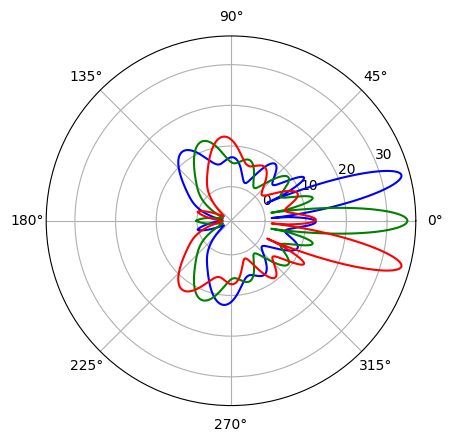

In [2]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = Model(np.pi/20,100,np.pi/12)
m.polar_plot()
m.spatial_plot()
m.plot_recieved_signals()
m.plot_all_mono_pairs(-np.pi/2,np.pi/2)
m.difference_distributions()
m.all_probability_distributions()

In [ ]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angles = np.linspace(0, np.pi/2, 5)

m = Model(np.pi/16, 100, 0)

for angle in angles:
    m.set_antenna_separation(angle)
    m.polar_plot()
    m.estimate_angle()

In [ ]:
from scipy.stats import norm

x = [10,4,4,1,10,4,0,4,4,4,10]
y = [1,2,3,4,5,6,7,8,9,10,11]
a = norm(10,5).cdf(x)
a /= np.sum(a)

plt.figure()
plt.subplot()
plt.plot(y,a)

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()


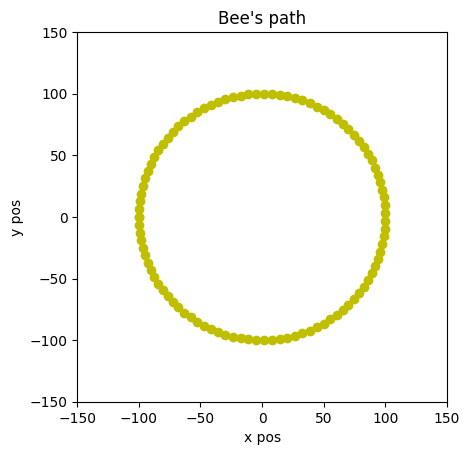

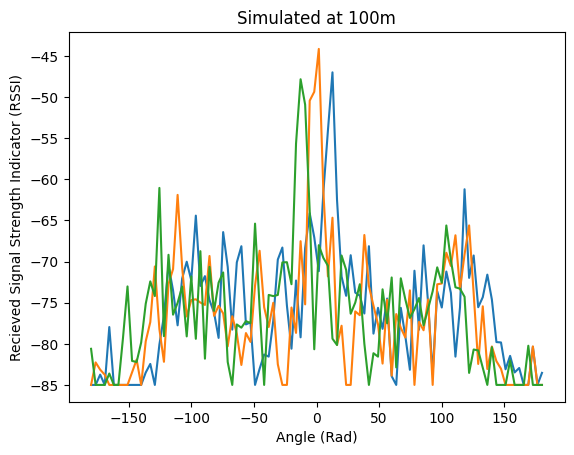

In [1]:
import timeit
from Evaluation import Evaluation
from Model import Model
import numpy as np

m = Model(0.174,100,np.pi/16)

m.test_at_100()

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:112: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


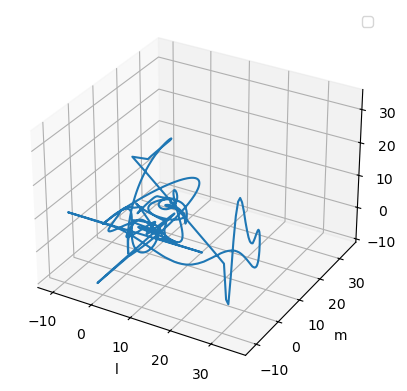

In [7]:
import numpy as np
from Model import Model

m = Model(np.pi/12,100,3)

m.plot_3d()

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()


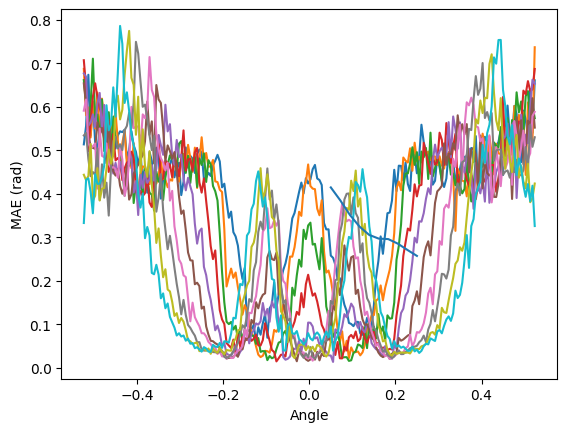

In [4]:
from Evaluation import Evaluation
from Model import Model
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

it = 100

m = Model(0,100,0.08,ant_types=("narrow","narrow","narrow"),eval_iterations=it)
m.set_antenna_separation(0)

eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"MODE")

angles = np.linspace(0.05,0.25,10)
areas = []
fig = plt.figure()

ax = plt.subplot()
for a in angles:
    eval.model.set_antenna_separation(a)
    areas.append(eval.opt_eval_MAE(ax))



ax.plot(angles,areas)


c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:16: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation P

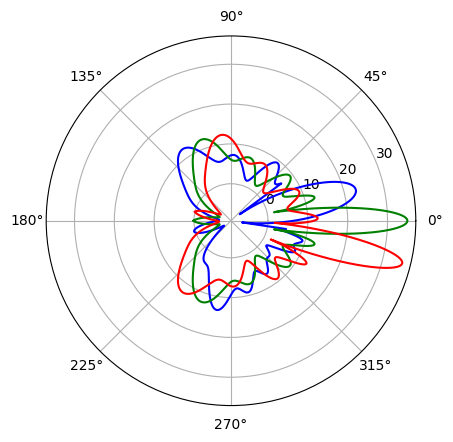

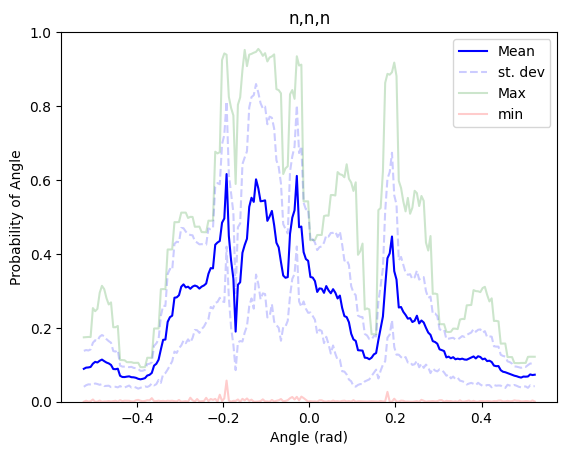

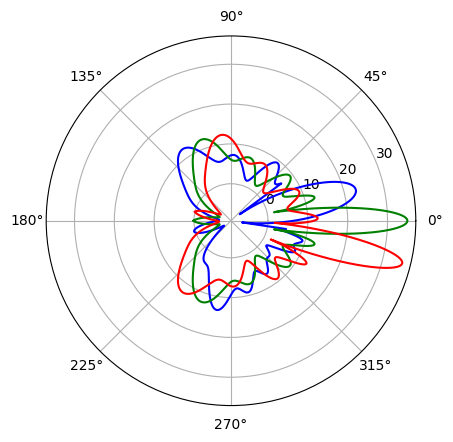

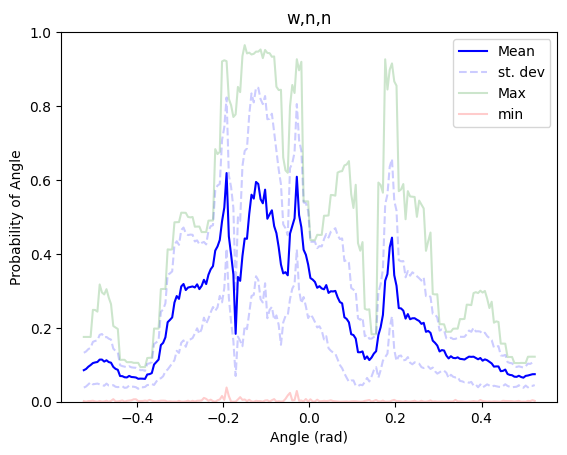

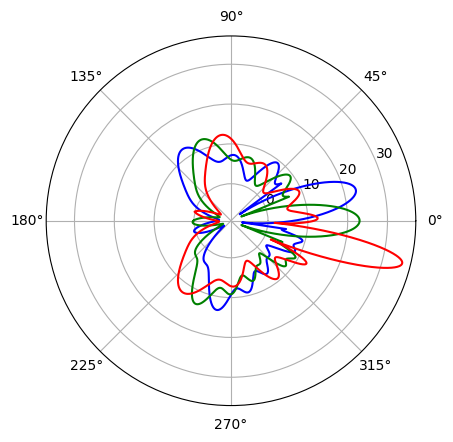

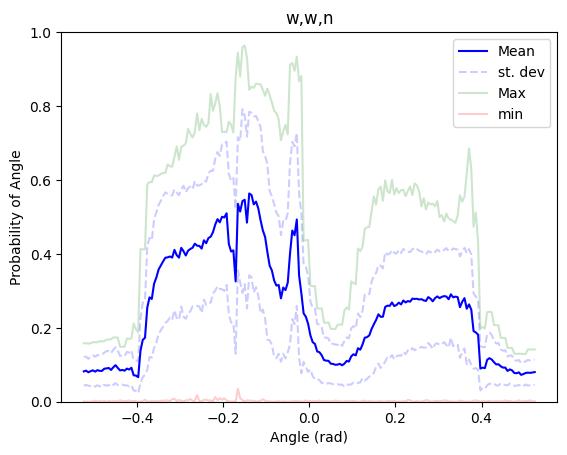

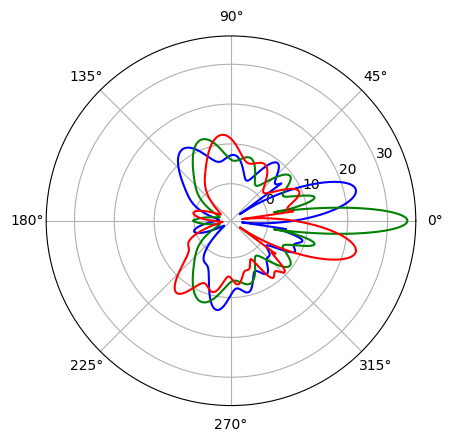

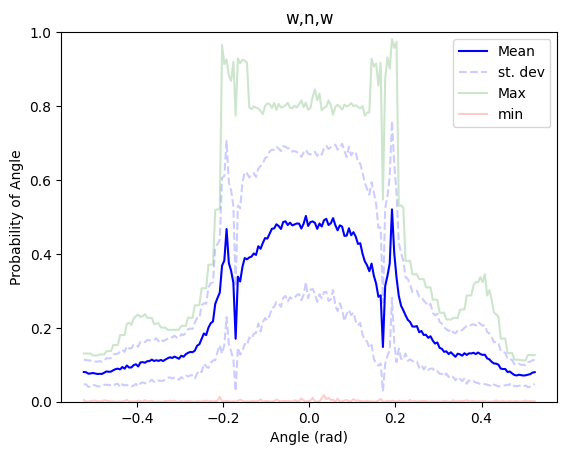

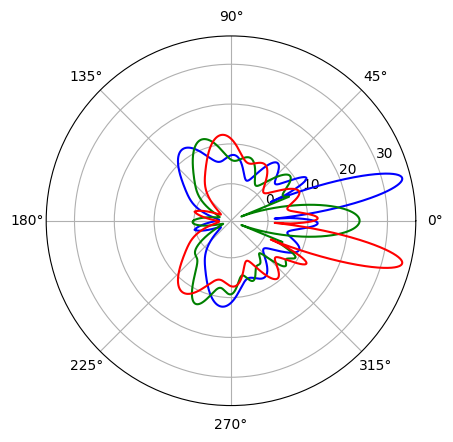

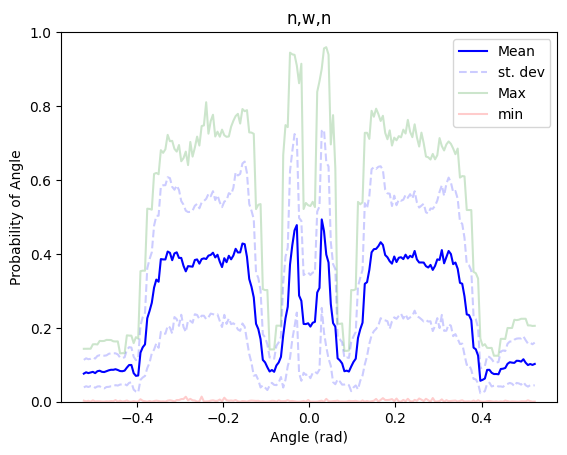

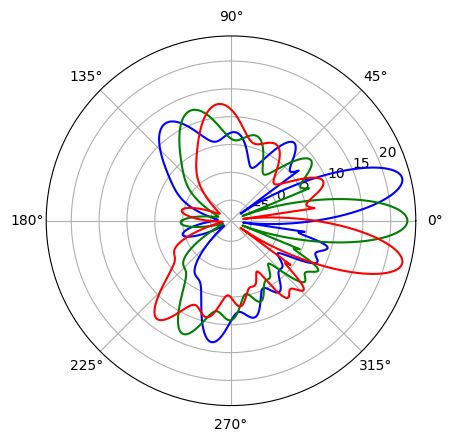

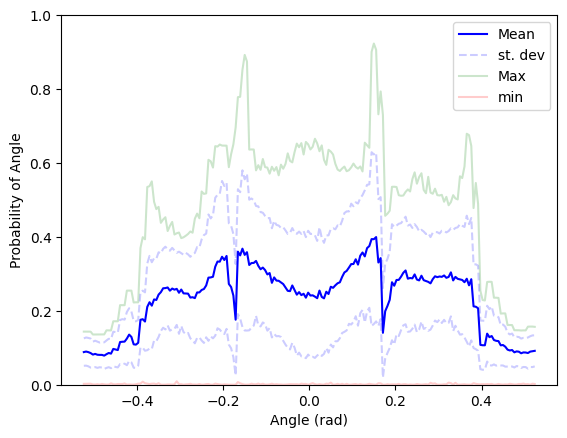

In [3]:
from Evaluation import Evaluation
from Model import Model
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

it = 500


m = Model(0,100,0.244,ant_types=("wide","narrow","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("n,n,n")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("wide","narrow","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("w,n,n")
eval.eval_prob(ax)


m = Model(0,100,0.244,ant_types=("wide","wide","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("w,w,n")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("wide","narrow","wide"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("w,n,w")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("narrow","wide","narrow"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
ax.set_title("n,w,n")
eval.eval_prob(ax)

m = Model(0,100,0.244,ant_types=("wide","wide","wide"),eval_iterations=it)
m.polar_plot()
eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,it,"PROB")
eval.model.set_antenna_separation(0.2242)
fig = plt.figure()
ax = plt.subplot()
ax.set_xlim
eval.eval_prob(ax)

#Negative Log Predicted Density


c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:115: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:115: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:115: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:115: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:115: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(side_lobes,lobes_dB,190,rcond=0)
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Pr

Moviepy - Building video flight_test1.mp4.
Moviepy - Writing video flight_test1.mp4



t:   0%|          | 0/100 [00:00<?, ?it/s, now=None]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   3%|▎         | 3/100 [00:00<00:06, 15.83it/s, now=None]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   5%|▌         | 5/100 [00:00<00:07, 13.03it/s, now=None]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in lege

Moviepy - Done !
Moviepy - video ready flight_test1.mp4


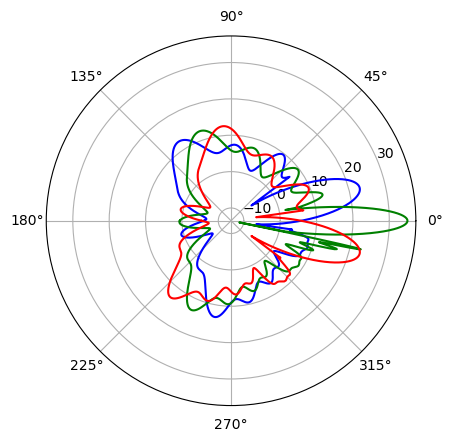

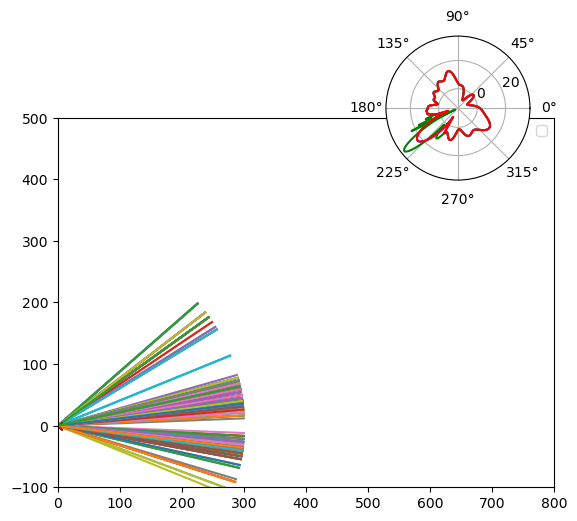

In [1]:
from Antenna import Antenna
from Array import Array
from Model import Model
from Evaluation import Evaluation

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = Model(0,100,0.251,ant_types=("wide","narrow","wide"))
m.polar_plot()

eval = Evaluation(m,0.1,0.4,100,-np.pi/6,np.pi/6,200,100,"PROB")
eval.make_flight_movie("flight_test1.mp4")


In [ ]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = Model(0,100, 0.261)
high = np.pi
low = -np.pi
'''
for angle in np.linspace(low,high,40):
    m.set_reciver_angle(angle)
    m.estimate_angle_vector(high,low)"
'''
a = np.linspace(-0.2,0.2,50)

for angle in a:
    m.angle_analysis(1)
    m.set_reciver_angle(angle)
    m.plot_estimation_vectors(np.pi,-np.pi)
    
#Rejection sampling
#exponential equal to 1 for pattern
#Should add up to 2pi
#Angle optimisation
    
#probability of actual angle given pdf over range
#probability  anlge-step < angle < + step
#repeat 100timeofs for each angle
#repeat for linspace -np.pi/4 np.pi/4, 500
#500 * 100 = 50000

In [ ]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

model = Model()

signals = np.empty(2000)
signals.fill(-30)
signals = model.gauss_noise(signals)
ax = plt.subplot()
ax.hist(signals, bins=100)